In [214]:
%matplotlib inline

In [221]:
import pandas as pd
data = pd.read_csv('legislative-agenda-coverage.csv', usecols = range(0,11), encoding = "ISO-8859-1")
data = data[:53]
data.head()

,Theme,Article,Bill(s) Mentioned,Coverage Ranking,Date,Author,Publication,Outlet Score,MJW/Bill Prominence Score,Sentiment Score,Text
0,Education,"Officials, Patriots push for education funding...",PROMISE Act,7.3,3/23/19,Mary Markos,Boston Herald,9.0,5.0,8.0,The Joint Committee on Education heard a full ...
1,Education,"How much is enough? Lawmakers, governor clash ...",PROMISE Act,6.7,3/23/19,Victoria McGrane,Boston Globe,10.0,5.0,5.0,In this year's first major hearing in the deba...
2,Education,Statehouse Hearing To Highlight Education Fund...,PROMISE Act,7.3,3/23/19,Bob Salsberg,WBUR,9.0,5.0,8.0,State officials and legislative leaders sounde...
3,Education,Here's What Happened at the Hearing on Educati...,PROMISE Act,7.7,3/23/19,Bob Salsberg,Boston.com,10.0,5.0,8.0,State officials and legislative leaders sounde...
4,Economic Mobility,Benjamin Franklin Institute joins Boston progr...,Community College,9.0,3/21/19,Annika Hom,Boston Globe,10.0,9.0,8.0,The Benjamin Franklin Institute of Technology ...


In [222]:
import nltk
from nltk.corpus import stopwords
import re
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

data.Text = data.Text.str.replace('Ò','\"')
data.Text = data.Text.str.replace('Ó','\"')
data.Text = data.Text.str.replace('Õ','\'')
data.Text = data.Text.str.replace('Ñ','-')
data.Text = data.Text.apply(lambda x: " ".join(x.lower() for x in re.split('\W+|/', str(x))))
data.Text = data.Text.str.replace('[^\w\s]','')
stop = stopwords.words('english')
data.Text = data.Text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.Text = data.Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

data.Text[0]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mnksmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mnksmith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mnksmith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'joint committee education heard full day testimony friday governor mayor new england patriot player public figure hundred student parent teacher asking state money run public school massachusetts still one worst achievement gap nation rich poor student state sen sonia chang diaz said testimony everybody know money alone also know without money chang diaz boston past chairman education committee testified education promise act filed along state rep aaron vega holyoke mary keefe worcester bill one three major piece legislation joint committee education considering address state school funding formula updated since 1993 two bill address issue filed vice chairman committee rep paul tucker salem gov charlie baker baker testified favor education bill friday act promote equity excellence education along secretary education jim peyser commissioner elementary secondary education jeffrey riley pitched bill package working stride budget proposal many community see persistent achievement gap miss

In [223]:
pos_words = pd.read_csv('opinion-lexicon-English/positive-words.txt', sep='\n', skiprows=29, 
                        header=None, names=['words']).words
neg_words = pd.read_csv('opinion-lexicon-English/negative-words.txt', sep='\n', skiprows=30, 
                        header=None, names=['words']).words



In [224]:
len(pos_words)

2006

In [225]:
len(neg_words)

4783

In [226]:
results = []
results2 = []
mayor = []
for i in range(len(data)):
    pos_count=0
    neg_count=0
    mayor_count=0
    for word in data.Text[i].split():
        if word in pos_words.values:
            pos_count+=1
        if word in neg_words.values:
            neg_count+=1
        if (word=='walsh') or (word=='mayor'):
            mayor_count+=1
    
    print(i)
    print(pos_count)
    print(neg_count)
    print(round(100*(pos_count - neg_count)/len(data.Text[i].split()),2))
    print(round(100*(pos_count**2 + neg_count**2)**(1/2)/len(data.Text[i].split()),2))
    results.append( 100*(pos_count - neg_count)/len(data.Text[i].split()) )
    results2.append( 100*(pos_count + neg_count)/len(data.Text[i].split()) )
    mayor.append(mayor_count)

data['Sentiment Calc'] = results
data['Sentiment Mag'] = results2
data['Mayor Count'] = mayor

0
14
11
1.04
6.18
1
25
19
0.89
4.65
2
11
12
-0.23
3.77
3
11
12
-0.23
3.77
4
13
3
4.27
5.7
5
64
29
2.94
5.9
6
64
29
2.94
5.9
7
29
21
1.68
7.54
8
19
11
1.71
4.68
9
42
12
6.02
8.77
10
42
12
6.02
8.77
11
18
13
2.23
9.91
12
24
10
2.71
5.04
13
9
7
0.65
3.69
14
20
11
2.8
7.11
15
17
19
-0.32
4.11
16
15
9
1.26
3.66
17
43
9
4.68
6.04
18
43
23
2.78
6.78
19
16
2
4.24
4.89
20
44
28
1.83
5.98
21
19
18
0.21
5.43
22
3
3
0.0
5.44
23
3
3
0.0
5.44
24
36
19
3.08
7.37
25
55
15
5.23
7.45
26
36
14
3.91
6.86
27
27
17
1.54
4.91
28
15
17
-0.55
6.26
29
5
18
-6.02
8.65
30
19
16
0.89
7.39
31
22
11
2.37
5.29
32
5
6
-0.35
2.77
33
41
28
1.64
6.25
34
7
9
-1.1
6.26
35
16
4
3.86
5.3
36
6
2
2.27
3.59
37
18
10
2.82
7.25
38
10
9
0.49
6.53
39
4
1
2.31
3.17
40
0
0
0.0
0.0
41
5
5
0.0
4.48
42
12
10
1.06
8.31
43
1
19
-9.63
10.17
44
4
6
-1.92
6.93
45
20
4
4.75
6.05
46
14
9
1.8
5.99
47
22
11
4.3
9.61
48
36
10
5.19
7.46
49
4
3
1.09
5.43
50
15
13
0.94
9.32
51
9
2
4.27
5.62
52
48
12
8.59
11.81


In [227]:
data.head()

,Theme,Article,Bill(s) Mentioned,Coverage Ranking,Date,Author,Publication,Outlet Score,MJW/Bill Prominence Score,Sentiment Score,Text,Sentiment Calc,Sentiment Mag,Mayor Count
0,Education,"Officials, Patriots push for education funding...",PROMISE Act,7.3,3/23/19,Mary Markos,Boston Herald,9.0,5.0,8.0,joint committee education heard full day testi...,1.041667,8.680556,4
1,Education,"How much is enough? Lawmakers, governor clash ...",PROMISE Act,6.7,3/23/19,Victoria McGrane,Boston Globe,10.0,5.0,5.0,year first major hearing debate education fund...,0.888889,6.518519,3
2,Education,Statehouse Hearing To Highlight Education Fund...,PROMISE Act,7.3,3/23/19,Bob Salsberg,WBUR,9.0,5.0,8.0,state official legislative leader sounded opti...,-0.231481,5.324074,4
3,Education,Here's What Happened at the Hearing on Educati...,PROMISE Act,7.7,3/23/19,Bob Salsberg,Boston.com,10.0,5.0,8.0,state official legislative leader sounded opti...,-0.231481,5.324074,4
4,Economic Mobility,Benjamin Franklin Institute joins Boston progr...,Community College,9.0,3/21/19,Annika Hom,Boston Globe,10.0,9.0,8.0,benjamin franklin institute technology become ...,4.273504,6.837607,4


/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


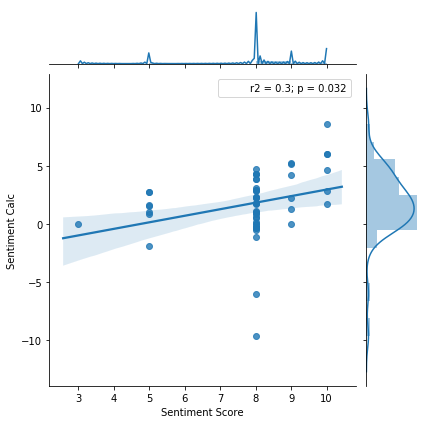

In [228]:
import seaborn as sns
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)#[0] ** 2

sns.jointplot(data['Sentiment Score'], data['Sentiment Calc'], kind='reg', stat_func=r2)


In [229]:
data.loc[data['Sentiment Calc']<-5]

,Theme,Article,Bill(s) Mentioned,Coverage Ranking,Date,Author,Publication,Outlet Score,MJW/Bill Prominence Score,Sentiment Score,Text,Sentiment Calc,Sentiment Mag,Mayor Count
29,"Health, Public Safety",Boston top cop introduces bills to curb gun vi...,"Vehicles Transporting Guns, Doctors & Guns in ...",8.7,1/10/19,Taylor Pettaway,Boston Herald,9.0,9.0,8.0,aggressive bill proposal backed boston police ...,-6.018519,10.648148,2
43,Environment,Boston mayor asks state lawmakers to penalize ...,Gas Leaks Fine,9.0,1/8/19,NaN,WCBV,9.0,10.0,8.0,boston mayor marty walsh second suite legislat...,-9.625668,10.695187,9


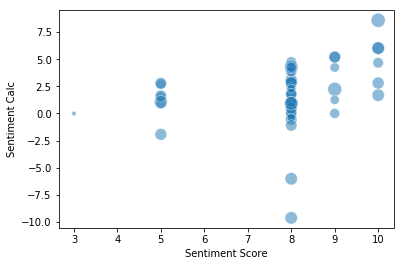

In [230]:
sns.scatterplot(x=data['Sentiment Score'], y=data['Sentiment Calc'], 
                size=data['Sentiment Mag'], sizes=(20,200), alpha=0.5, legend=False)

/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


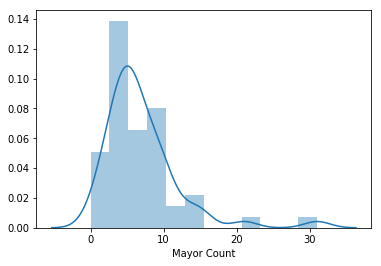

In [178]:
sns.distplot(data['Mayor Count'])

In [232]:
from textblob import TextBlob

polarities = []
subjectivities = []
for i in range(len(data)):
    polarity = TextBlob(data.Text[i]).polarity
    subjectivity = TextBlob(data.Text[i]).subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)
    
data['polarity'] = polarities
data['subjectivity'] = subjectivities

/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


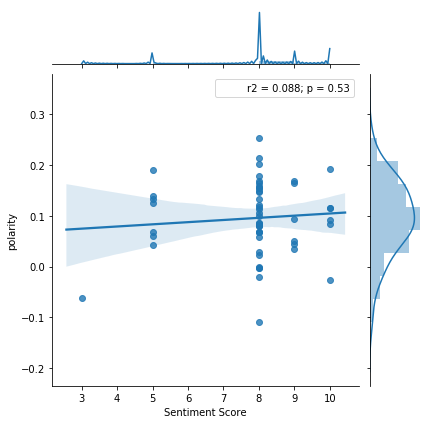

In [233]:
sns.jointplot(x=data['Sentiment Score'], y=data['polarity'], kind='reg', stat_func=r2)

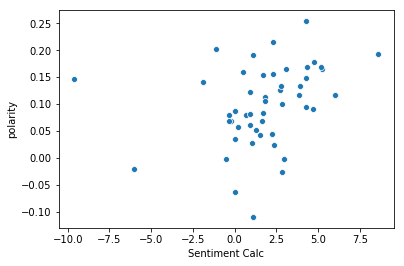

In [185]:
sns.scatterplot(x=data['Sentiment Calc'], y=data['polarity'])

In [247]:
train=pd.read_csv('train.tsv', sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [248]:
len(train)

156060